<h1>Prova 1 - Introdução à Ciência dos Dados</h1>
<h3>Daniel Freitas Martins - 2304</h3>

In [133]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import percentileofscore
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns
import operator

In [2]:
def analisarAmostraPopulacao(populacao, amostra, limiar=0.05):
    print("\t\t\t Amostra "+str(i))
    
    media_populacao=populacao.mean()
    media_amostra=np.mean(amostra)
    erro_padrao=populacao.std() / np.sqrt(len(amostra))
    z_score = abs(media_amostra - media_populacao) / erro_padrao
    valor_p = 2*st.norm.sf(abs(z_score))
    
    print("Média População: %.3f" % (media_populacao))
    print("Média Amostra: ",(media_amostra))
    print("Erro Padrão:"+str(erro_padrao))
    print("A diferença entre a média da amostra e da população é de %.3f erros padrões." % (z_score))
    print("Valor-p: %.10f" % (valor_p))
    
    if(valor_p < limiar):
        print("Provavelmente a Amostra NÃO veio da População.")
    else:
        print("Provavelmente a Amostra VEIO da População.")
        
    print("\n\n")


In [14]:
def lerCSV(caminho_arquivo, header):
    return pd.read_csv(caminho_arquivo, index_col=False, header=header, squeeze=True)

In [3]:
def analisarDuasAmostras(amostra_1, amostra_2):
    amostras = []
    amostras.append(amostra_1)
    amostras.append(amostra_2)
    print('Média amostra 1:         %.2f' % (np.mean(amostra_1)))
    print('Desvio padrão amostra 1: %.2f\n' % (np.std(amostra_1)))
    print('Média amostra 2:         %.2f' % (np.mean(amostra_2)))
    print('Desvio padrão amostra 2: %.2f\n' % (np.std(amostra_2)))
    print('Média de ambas as amostras:         %.2f' % (np.mean(amostras)))
    print('Desvio padrão de ambas as amostras: %.2f' % (np.std(amostras)))
    plt.hist(amostras, 100, density=True, align='mid')
    plt.show()

In [4]:
def getIntervaloConfianca95(data):
    # 95% intervalo confiança
    mean=data.mean()
    sd=data.std()
    n=len(data)
    std_error=sd/np.sqrt(n)
    print("Erro padrao %.3f " % std_error)
    print("Intervalo de confiança: %.3f - %.3f " % ((mean-(1.96*std_error)),(mean+(1.96*std_error))))    
    return mean,1.96*std_error

In [6]:
def getNumeroErrosPadroesDiferencaMedias(data1, data2): #str_error_diff_mean
    mean1=data1.mean()
    mean2=data2.mean()
    std1=data1.std()
    std2=data2.std()
    n1=len(data1)
    n2=len(data2)
    std_error_diff=np.sqrt((np.power(std1,2)/n1) + (np.power(std2,2)/n2))
    diff_mean=mean1-mean2
    print("Diferencas das medias: %.3f " % diff_mean)
    print("Erro padrão: %.3f " % std_error_diff)
    return (diff_mean/std_error_diff)

In [7]:
def gerarErrorBar(data_1, data_2, titulo_data_1 = 'data1', titulo_data_2 = 'data2'):
    mean_data_1,std_error_data_1=confidence_interval(data1)
    mean_data_2,std_error_data_2=confidence_interval(data2)
    x = [mean_data_1, mean_data_2]
    y = [1, 3]
    errors = [std_error_data_1, std_error_data_2]
    plt.figure()
    plt.errorbar(x, y, xerr=errors, fmt = 'o', color = 'k')
    plt.yticks((0, 1, 3, 4), ('', titulo_data_1, titulo_data_2,'')) 
    plt.show()

In [8]:
def gerarHistogramaDuasAmostras(amostra_1, amostra_2):
    amostras = []
    amostras.append(amostra_1)
    amostras.append(amostra_2)
    plt.hist(amostras, 100, density=True, align='mid', color=['b', 'r'])
    plt.show()

<h2>Lendo dados de "Filmes-Prova01.csv", correspondentes a lista de filmes de quatro plataformas de <i>Streaming</i> (Netflix, Amazon Prime, Disney+ e Hulu)</h2>

In [15]:
df = lerCSV("Filmes-Prova01.csv", header=0)
df.head(3)

,ID,Titulo,Ano,Classificacao_etaria,IMDb,Netflix,Hulu,Amazon_prime,Disney+,Diretores,Generos,Pais,Idioma,Duracao_min
0,1,Inception,2010,13+,8.8,1,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,2,The Matrix,1999,18+,8.7,1,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,3,Avengers: Infinity War,2018,13+,8.5,1,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0


<h2>1) Quantos filmes cada uma das 4 plataformas possui? Faça um gráfico de barras para ilustrar esses valores</h2>

Quantidade de filmes em cada plataforma:
	- Netflix: 3560
	- Hulu: 903
	- Amazon Prime: 12354
	- Disney+: 564


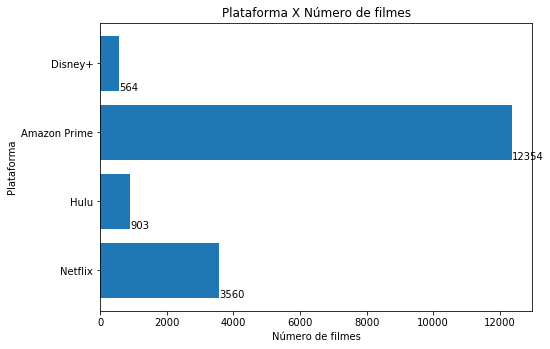

In [283]:
qtd_filmes_netflix = df['Netflix'].sum()
qtd_filmes_hulu = df['Hulu'].sum()
qtd_filmes_amazon = df['Amazon_prime'].sum()
qtd_filmes_disney = df['Disney+'].sum()
print("Quantidade de filmes em cada plataforma:")
print("\t- Netflix:", qtd_filmes_netflix)
print("\t- Hulu:", qtd_filmes_hulu)
print("\t- Amazon Prime:", qtd_filmes_amazon)
print("\t- Disney+:", qtd_filmes_disney)
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
plataformas = ['Netflix', 'Hulu', 'Amazon Prime', 'Disney+']
qtd_filmes_plataformas = [qtd_filmes_netflix, qtd_filmes_hulu,
                         qtd_filmes_amazon, qtd_filmes_disney]
ax.barh(plataformas, qtd_filmes_plataformas)
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+5,p.get_y()))
ax.set_ylabel('Plataforma')
ax.set_xlabel('Número de filmes')
plt.title('Plataforma X Número de filmes')
plt.show()

<h2>2) Quantos filmes estão em mais de uma plataforma?</h2>

In [47]:
qtd = 0
for index, row in df.iterrows(): # iterando sobre todas as linhas
    if(row['Netflix'] == 1): # se tiver em Netflix, avaliar se tem para algum outro
        if(row['Hulu'] == 1 or row['Amazon_prime'] == 1 or row['Disney+'] == 1):
            qtd+=1 # se tiver para Netflix e algum outro, soma 1
            continue # vá para a próxima linha
    if(row['Hulu'] == 1): # se tiver em Hulu, já sabemos que não tem em Netflix
        if(row['Amazon_prime'] == 1 or row['Disney+'] == 1): # avaliando para os restantes
            qtd+=1 # Analogamente, soma-se 1 se tiver para Hulu e outra plataforma
            continue
    if(row['Amazon_prime'] == 1):
        if(row['Disney+'] == 1):
            qtd+=1
            continue
print("Nº de filmes que estão em mais de uma plataforma:", qtd)

Nº de filmes que estão em mais de uma plataforma: 627


<h2>3) Qual a plataforma que possui a maior média de nota IMDb?</h2>

In [37]:
df_filmes_netflix = df[df['Netflix'] == 1]
df_filmes_hulu = df[df['Hulu'] == 1]
df_filmes_amazon = df[df['Amazon_prime'] == 1]
df_filmes_disney = df[df['Disney+'] == 1]

In [61]:
def calcularMediaIMDb(df, nome_plataforma):
    media = df['IMDb'].sum() / len(df)
    print('Média de nota IMDb da plataforma', nome_plataforma, "=", media)
    return media

In [142]:
media_netflix = calcularMediaIMDb(df_filmes_netflix, 'Netflix')
media_hulu = calcularMediaIMDb(df_filmes_hulu, 'Hulu')
media_amazon = calcularMediaIMDb(df_filmes_amazon, 'Amazon Prime')
media_disney = calcularMediaIMDb(df_filmes_disney, 'Disney+')

v = {'Netflix': media_netflix, 'Hulu': media_hulu, 'Amazon Prime': media_amazon, 'Disney+': media_disney}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print("\nA plataforma que possui maior média de nota IMDb é a %s, com uma média de aproximadamente %.2f."%(nome_plat, v[nome_plat]))

Média de nota IMDb da plataforma Netflix = 6.04570224719101
Média de nota IMDb da plataforma Hulu = 6.063344407530454
Média de nota IMDb da plataforma Amazon Prime = 5.562570827262425
Média de nota IMDb da plataforma Disney+ = 6.429964539007092

A plataforma que possui maior média de nota IMDb é a Disney+, com uma média de aproximadamente 6.43.


<h2>4) Qual o percentual de filmes de cada plataforma com nota IMDb maior que 8?</h2>

In [87]:
def calcularPercentualNotaIMDb(df, nome_plataforma, limiar=8):
    qtd = 0
    for index, row in df.iterrows():
        if(row['IMDb'] > 8):
            qtd+=1
    percentual = qtd/len(df)*100
    print('\t-', nome_plataforma, "= {:.2f}%".format(percentual))
    return percentual

In [209]:
print('Percentual de filmes de cada plataforma com nota IMDb maior que 8:')
pnet = calcularPercentualNotaIMDb(df_filmes_netflix, "Netflix")
phul = calcularPercentualNotaIMDb(df_filmes_hulu, "Hulu")
pama = calcularPercentualNotaIMDb(df_filmes_amazon, "Amazon Prime")
pdis = calcularPercentualNotaIMDb(df_filmes_disney, "Disney+")

v = {'Netflix': pnet, 'Hulu': phul, 'Amazon Prime': pama, 'Disney+': pdis}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print('\n')
print(nome_plat, 'possui um maior percentual de filmes com nota IMDb maior que 8.')

Percentual de filmes de cada plataforma com nota IMDb maior que 8:
	- Netflix = 3.62%
	- Hulu = 2.55%
	- Amazon Prime = 2.62%
	- Disney+ = 3.72%


Disney+ possui um maior percentual de filmes com nota IMDb maior que 8.


<h2>5) Se uma pessoa é uma apreciadora de filmes clássicos antigos, qual plataforma você mais recomenda? Justifique.</h2>

In [210]:
df_antigos = df[df['Ano'] <= 1990]
qtd_antigos_netflix = df_antigos['Netflix'].sum()
qtd_antigos_hulu = df_antigos['Hulu'].sum()
qtd_antigos_amazon = df_antigos['Amazon_prime'].sum()
qtd_antigos_disney = df_antigos['Disney+'].sum()
print("Nº filmes antigos Netflix:", qtd_antigos_netflix)
print("Nº filmes antigos Hulu:", qtd_antigos_hulu)
print("Nº filmes antigos Amazon Prime:", qtd_antigos_amazon)
print("Nº filmes antigos Disney+:", qtd_antigos_disney)

v = {'Netflix': qtd_antigos_netflix, 'Hulu': qtd_antigos_hulu, 'Amazon Prime': qtd_antigos_amazon, 'Disney+': qtd_antigos_disney}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print('\n')
print(nome_plat, 'possui um maior número de filmes antigos.')

Nº filmes antigos Netflix: 123
Nº filmes antigos Hulu: 52
Nº filmes antigos Amazon Prime: 2881
Nº filmes antigos Disney+: 133


Amazon Prime possui um maior número de filmes antigos.


<p>Considerando-se que os filmes antigos clássicos estão abaixo do ano de 1990 (inclusive), eu recomendaria a plataforma <b>Amazon Prime</b> por possuir um maior número de filmes antigos. Em comparação com Disney+, a Amazon Prime possui 20 vezes mais filmes antigos disponíveis para escolha.</p>

<h2>6) Quantas categorias de classificação etária existem? Faça um gráfico de barras com a quantidade de filmes por classificação etária.</h2>

In [121]:
df_classificacao_unique = df['Classificacao_etaria'].unique
df_classificacao_unique

<bound method Series.unique of 0        13+
1        18+
2        13+
3         7+
4        18+
        ... 
16739    NaN
16740     7+
16741    NaN
16742    NaN
16743    NaN
Name: Classificacao_etaria, Length: 16744, dtype: object>

<p>Note que existem valores <b>NaN</b>. No entanto, vou considerar para ver também a quantidade de filmes que não possuem a classificação etária informada...</p>

In [163]:
#df_classificacao_unique = df['Classificacao_etaria'].dropna().unique()
df_classificacao_unique = df['Classificacao_etaria'].unique()
df_classificacao_unique

array(['13+', '18+', '7+', nan, 'all', '16+'], dtype=object)

In [162]:
qtd_categorias_classificacao_etaria = len(df_classificacao_unique)
print('- Existem', (qtd_categorias_classificacao_etaria-(1 if pd.isnull(df_classificacao_unique).any() else 0)), 
      'categorias de classificação etária diferentes nesta base de dados.\n')
print('- Existem filmes em que a categoria de classificação etária está ausente, como visto acima.')

- Existem 5 categorias de classificação etária diferentes nesta base de dados.

- Existem filmes em que a categoria de classificação etária está ausente, como visto acima.


In [226]:
dict_somas = dict((el if el is not np.nan else 'Não informado',0) for el in df_classificacao_unique)
for k in dict_somas:
    if(k == 'Não informado'):
        dict_somas[k] = len(df[pd.isnull(df['Classificacao_etaria'])])
    else:
        dict_somas[k] = len(df[df['Classificacao_etaria'] == k])
#for index, row in df.iterrows():
#    dict_somas[row['Classificacao_etaria'] if row['Classificacao_etaria'] is not np.nan else 'Não informado'] += 1
dict_somas

{'13+': 1255,
 '18+': 3474,
 '7+': 1462,
 'Não informado': 9390,
 'all': 843,
 '16+': 320}

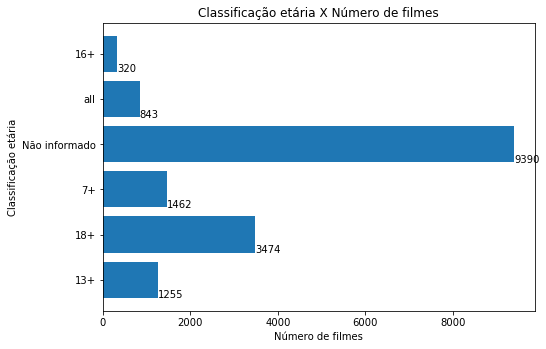

In [282]:
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
classificacoes_etarias = list(dict_somas)
qtd_filmes = list(dict_somas.values())
ax.barh(classificacoes_etarias, qtd_filmes)
for p in ax.patches:
    ax.annotate(p.get_width(), (p.get_width()+5,p.get_y()))
ax.set_ylabel('Classificação etária')
ax.set_xlabel('Número de filmes')
plt.title('Classificação etária X Número de filmes')
plt.show()

<p>Note que existe um número muito grande de filmes em que a classificação indicativa não está disponível. Isso pode ser um empecilho na hora de escolher determinados filmes para assistir com toda a família, por exemplo. Das cinco categorias, existem mais filmes adultos (18+) do que os demais.</p>

<h2>7) Qual plataforma você mais indicaria para uma criança? Justifique.</h2>

<p>L8069 - Planalto: Art. 2º Considera-se criança, para os efeitos desta Lei, a pessoa até doze anos de idade incompletos, e adolescente aquela entre doze e dezoito anos de idade. (http://www.planalto.gov.br/ccivil_03/leis/l8069.htm)</p>

In [234]:
df_classificacao = df.groupby('Classificacao_etaria')
df_classificacao_sum = df_classificacao.sum()
df_classificacao_sum

,ID,Ano,IMDb,Netflix,Hulu,Amazon_prime,Disney+,Duracao_min
Classificacao_etaria,,,,,,,,
13+,7854671,2520581,7610.0,383,119,819,40,126263.0
16+,2369560,644328,1759.3,89,17,226,1,29599.0
18+,25150626,6965709,19455.0,752,290,2612,3,331409.0
7+,11777371,2926728,8837.5,323,109,916,179,141755.0
all,8901648,1682715,5135.4,130,55,406,277,74747.0


In [232]:
df_menores = df_classificacao_sum[(df_classificacao_sum.index == '7+') | (df_classificacao_sum.index == 'all')].sum()
qtd_menores_netflix = df_menores['Netflix']
qtd_menores_hulu = df_menores['Hulu']
qtd_menores_amazon = df_menores['Amazon_prime']
qtd_menores_disney = df_menores['Disney+']
print("Nº filmes para crianças Netflix:", qtd_menores_netflix)
print("Nº filmes para crianças Hulu:", qtd_menores_hulu)
print("Nº filmes para crianças Amazon Prime:", qtd_menores_amazon)
print("Nº filmes para crianças Disney+:", qtd_menores_disney)
v = {'Netflix': qtd_menores_netflix, 'Hulu': qtd_menores_hulu, 'Amazon Prime': qtd_menores_amazon, 'Disney+': qtd_menores_disney}
nome_plat = max(v.items(), key=operator.itemgetter(1))[0]

print('\n')
print(nome_plat, 'possui um maior número de filmes próprios para crianças (menores de 12 anos).')

Nº filmes para crianças Netflix: 453.0
Nº filmes para crianças Hulu: 164.0
Nº filmes para crianças Amazon Prime: 1322.0
Nº filmes para crianças Disney+: 456.0


Amazon Prime possui um maior número de filmes próprios para crianças (menores de 12 anos).


<p>A plataforma Amazon Prime tem um maior número de filmes com classificação indicativa destinada à crianças (menores de 12 anos). No entanto, ela possui um grande número de filmes adultos.</p>
<p>- Caso haja um acompanhamento com os pais ou um controle facilitado pela plataforma, eu recomendaria a Amazon Prime.</p>
<p>- Caso não haja esse acompanhamento com os pais, permitindo que a criança possa assistir e escolher os filmes livremente, eu recomendaria a Disney+, por conter um número razoável de filmes para crianças e poucos filmes destinados aos públicos adolescente e adulto.</p>

<h2>8) Faça um gráfico de linhas com a quantidade de filmes disponíveis por ano de lançamento. Qual o ano que possui mais filmes, e quantos filmes foram lançados nesse ano? Qual a média de lançamento de filmes por ano? Trace uma linha reta no gráfico com a média, e responda em quais anos foram lançados mais filmes do que a média.</h2>

Média de lançamentos de filmes por ano: 153.61


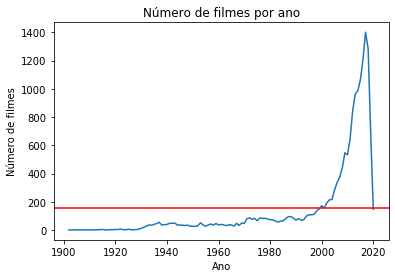

In [292]:
df_anos = df.copy()
df_anos['qtd_filmes'] = 1
df_anos = df_anos.groupby('Ano')
df_anos_sum = df_anos['qtd_filmes'].sum()
ax = df_anos_sum.plot(kind='line')

media_lancamentos = df_anos_sum.agg('mean')
print('Média de lançamentos de filmes por ano: %.2f'%media_lancamentos)

plt.axhline(y=media_lancamentos, color='r', linestyle='-')
plt.title('Número de filmes por ano')
ax.set_ylabel('Número de filmes')
plt.show()

In [293]:
print('Ano que possui mais filmes e nº de filmes lançados neste ano:')
df_anos_sum.sort_values(ascending=False).head(1)

Ano que possui mais filmes e nº de filmes lançados neste ano:


Ano
2017    1401
Name: qtd_filmes, dtype: int64

In [302]:
df_anos_acima_media = df_anos_sum[df_anos_sum > media_lancamentos]
print("Quantidade de anos cujos nº de lançamento foram maiores que a média: ", len(df_anos_acima_media))
print('Anos com número de lançamentos maior do que a média:')
print('Ano ','Nº lançamentos')
for k in df_anos_acima_media.keys():
    print(k, df_anos_acima_media[k])


Quantidade de anos cujos nº de lançamento foram maiores que a média:  20
Anos com número de lançamentos maior do que a média:
Ano  Nº lançamentos
2000 172
2001 156
2002 193
2003 214
2004 217
2005 285
2006 338
2007 375
2008 442
2009 548
2010 533
2011 645
2012 843
2013 964
2014 986
2015 1065
2016 1206
2017 1401
2018 1285
2019 689


<p>Apenas para sintetizar a resposta:</p>
<p>- O ano de 2017 teve o maior nº de lançamentos (1401) dentre todos os anos desta base de dados.</p>
<p>- A média de lançamento de filmes por ano foi de aproximadamente 153 filmes por ano.</p>
<p>- Dos anos de 2000 a 2019, 20 anos ao todo, tiveram o nº de lançamentos maiores do que a média.</p>

<h2>9) Faça o Boxplot da duração dos filmes. Em seguida, remova os outliers que achar necessário, e faça o histograma da duração. Ajuste o parâmetro "bins" se necessário, para visualizar melhor. Em seguida,  responda se os valores de duração seguem a distribuição Normal. Justifique.</h2>